In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [2]:
from tensorflow.keras.callbacks import TensorBoard
log_dir = "./logs/labo3"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [10]:
def create_dataset(n_sequences, sequence_length):
    X = np.random.randint(0, 100, size=(n_sequences, sequence_length))
    y = X[:, -1]
    return X, y

X, y = create_dataset(1000, 10)

In [11]:
X[0]

array([39, 15, 98, 52, 81, 74, 70, 41, 10, 79])

In [12]:
y[0]

79

In [13]:
X2 = X[:999]
X2[0]

array([39, 15, 98, 52, 81, 74, 70, 41, 10, 79])

In [14]:
y2 = np.array([y[i+1] for i in range(len(y)-1)])
y2[0]

27

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, shuffle=False)

In [16]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(50, activation='relu', input_shape=[None, 1]), # De none wil zeggen dat de input van de sequentie van verschillende lengtes kan zijn
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [17]:
model.fit(X_train, y_train, epochs=10, callbacks=[tensorboard_callback])
print("RNN model loss: ", model.evaluate(X_test, y_test)[0])

# test accuracy bij regressie niet zo goed te interpreteren

Epoch 1/10
24/24 [==============================] - 2s 7ms/step - loss: 2432.3325 - accuracy: 0.0147
Epoch 2/10
24/24 [==============================] - 0s 7ms/step - loss: 1017.7285 - accuracy: 0.0160
Epoch 3/10
24/24 [==============================] - 0s 8ms/step - loss: 957.2263 - accuracy: 0.0160
Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 939.3882 - accuracy: 0.0160
Epoch 5/10
24/24 [==============================] - 0s 8ms/step - loss: 922.3012 - accuracy: 0.0160
Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 913.2939 - accuracy: 0.0160
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 941.1571 - accuracy: 0.0160
Epoch 8/10
24/24 [==============================] - 0s 7ms/step - loss: 940.5356 - accuracy: 0.0160
Epoch 9/10
24/24 [==============================] - 0s 7ms/step - loss: 896.7382 - accuracy: 0.0160
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 939.1197 - accuracy: 0.0040

8/8 [==============================] - 0s 3ms/step


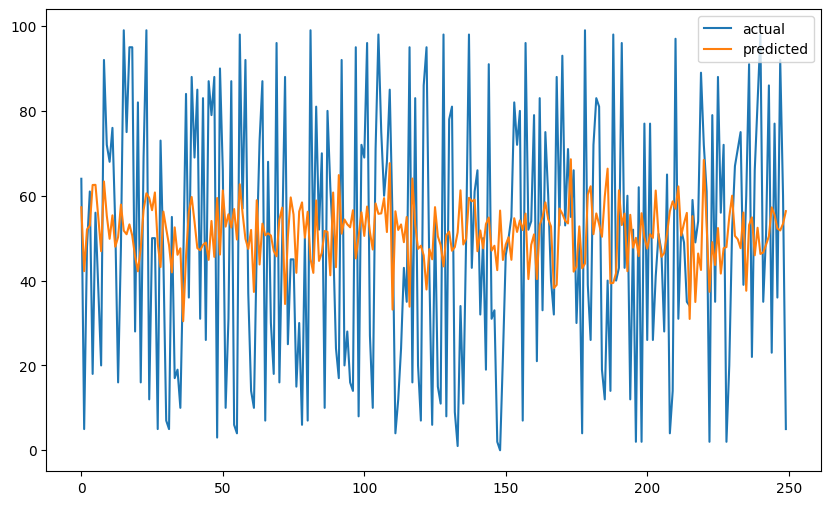

In [18]:
predicted = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="actual")
plt.plot(predicted, label="predicted")
plt.legend()
plt.show()

In [147]:
model = keras.models.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(None, 1)),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [148]:
model.fit(X_train, y_train, epochs=10)
print("LSTM model loss: ", model.evaluate(X_test, y_test)[0])

Epoch 1/10
24/24 [==============================] - 2s 6ms/step - loss: 2280.0413 - accuracy: 0.0147
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 1087.4850 - accuracy: 0.0120
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 928.0767 - accuracy: 0.0120
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 886.8452 - accuracy: 0.0120
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 815.9724 - accuracy: 0.0120
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 790.6127 - accuracy: 0.0120
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 787.4061 - accuracy: 0.0120
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 746.9044 - accuracy: 0.0120
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 720.8177 - accuracy: 0.0120
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 850.3282 - accuracy: 0.0040

8/8 [==============================] - 0s 3ms/step


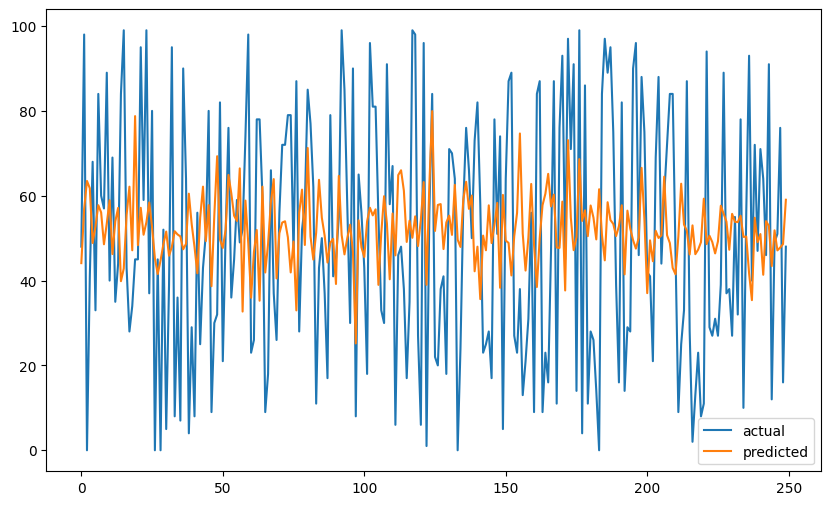

In [149]:
predicted = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="actual")
plt.plot(predicted, label="predicted")
plt.legend()
plt.show()

In [150]:
# Maakt een tijdsreeks met een aantal X waarden en een aantal opvolgende Y waarden om te voorspellen

def prepare_data_multi_step(seq, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(seq)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(seq):
            break
        seq_x, seq_y = seq[i:end_ix], seq[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [151]:
# Definieer de tijdspanne
tijd = np.arange(0, 100, 0.1)

# Maak een voorspelbare reeks met een sinusgolf voor de trend en wat ruis
trend = np.sin(tijd) * 10  # Sinusgolf trend
ruis = np.random.normal(0, 2, len(tijd))  # Normale verdeling ruis

# Combineer de trend met de ruis om de synthetische tijdsreeks te vormen
X = trend + ruis

In [152]:
X, y = prepare_data_multi_step(X, 10, 3) # 10 input, 3 te voorspellen

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False)

In [154]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(50, activation='relu', input_shape=[None, 1]), # De none wil zeggen dat de input van de sequentie van verschillende lengtes kan zijn
    keras.layers.Dense(3)
])

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [155]:
model.fit(X_train, y_train, epochs=10)
print("RNN model loss: ", model.evaluate(X_test, y_test)[0])

Epoch 1/10


24/24 [==============================] - 1s 3ms/step - loss: 24.2211 - accuracy: 0.3860
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 11.2960 - accuracy: 0.3873
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 9.1766 - accuracy: 0.4035
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 7.9339 - accuracy: 0.4278
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 7.6840 - accuracy: 0.4413
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 7.1513 - accuracy: 0.4359
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 6.8310 - accuracy: 0.4521
Epoch 8/10
24/24 [==============================] - 0s 3ms/step - loss: 6.6585 - accuracy: 0.4467
Epoch 9/10
24/24 [==============================] - 0s 3ms/step - loss: 6.4441 - accuracy: 0.4494
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 7.8163 - accuracy: 0.4332
RNN model loss:  7.81631851196

8/8 [==============================] - 0s 2ms/step


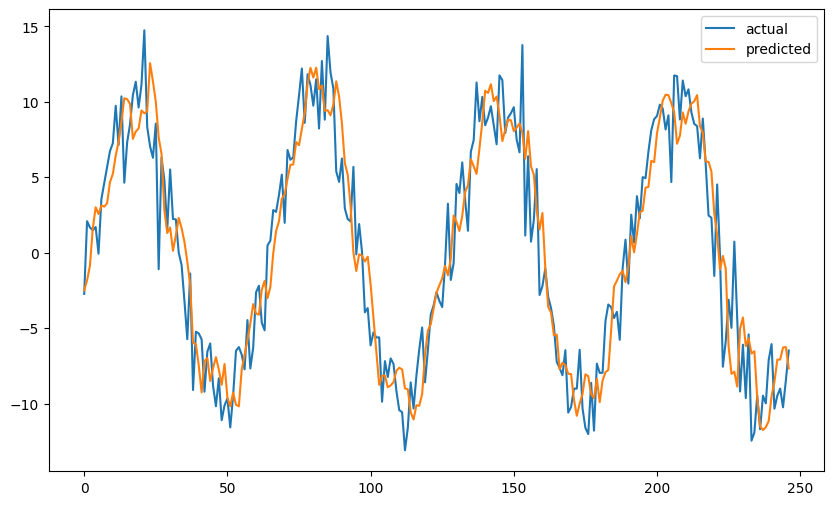

In [156]:
predicted = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label="actual")
plt.plot(predicted[:, 1], label="predicted")
plt.legend()
plt.show()

In [157]:
model = keras.models.Sequential([
    keras.layers.LSTM(50, activation='relu', input_shape=(None, 1)),
    keras.layers.Dense(3)
])
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [158]:
model.fit(X_train, y_train, epochs=10)
print("LSTM model loss: ", model.evaluate(X_test, y_test)[0])

Epoch 1/10
24/24 [==============================] - 2s 5ms/step - loss: 42.9478 - accuracy: 0.3077
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 23.4845 - accuracy: 0.3657
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 15.0578 - accuracy: 0.4049
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 9.7275 - accuracy: 0.4008
Epoch 5/10
24/24 [==============================] - 0s 9ms/step - loss: 7.6170 - accuracy: 0.4062
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 6.9540 - accuracy: 0.3981
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 6.6063 - accuracy: 0.4467
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 6.4326 - accuracy: 0.4238
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 6.3069 - accuracy: 0.4359
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 7.3942 - accuracy: 0.4737
LSTM model loss:  

8/8 [==============================] - 0s 3ms/step


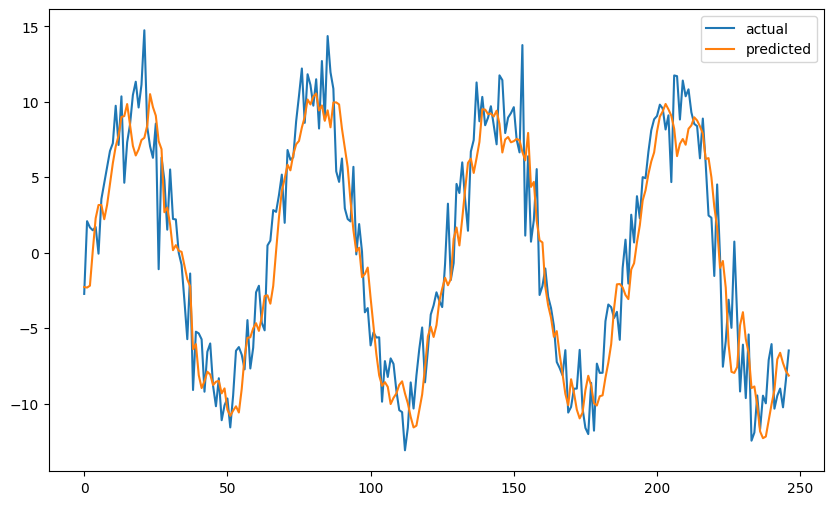

In [159]:
predicted = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test[:, 1], label="actual")
plt.plot(predicted[:, 1], label="predicted")
plt.legend()
plt.show()

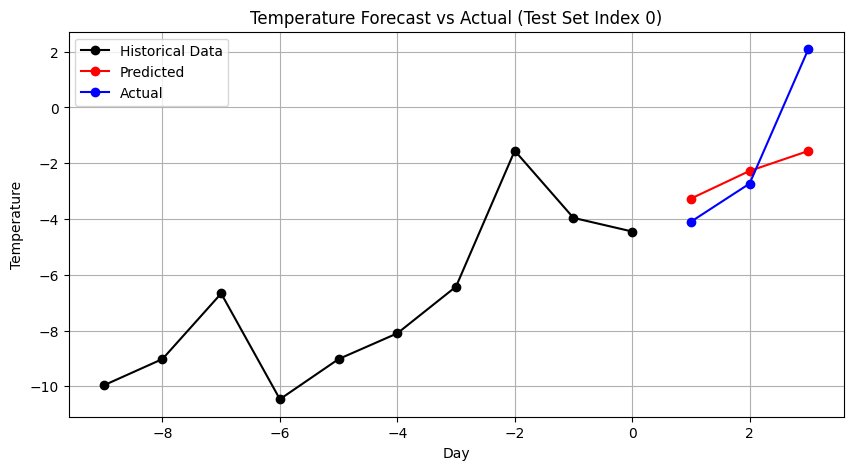

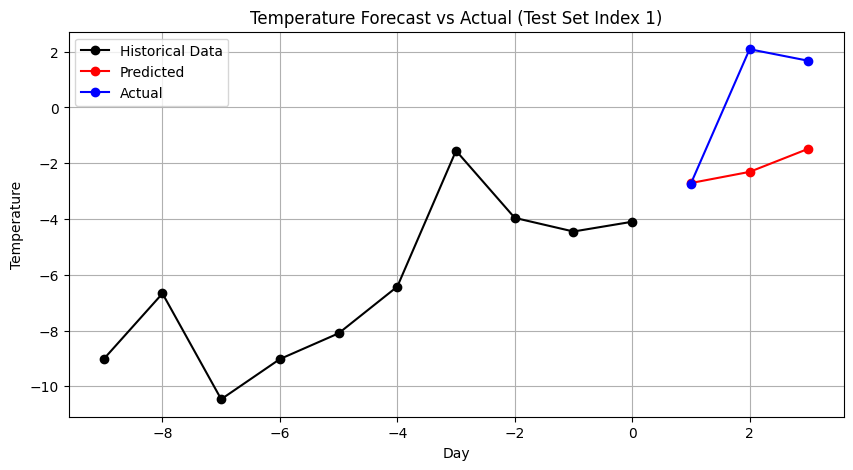

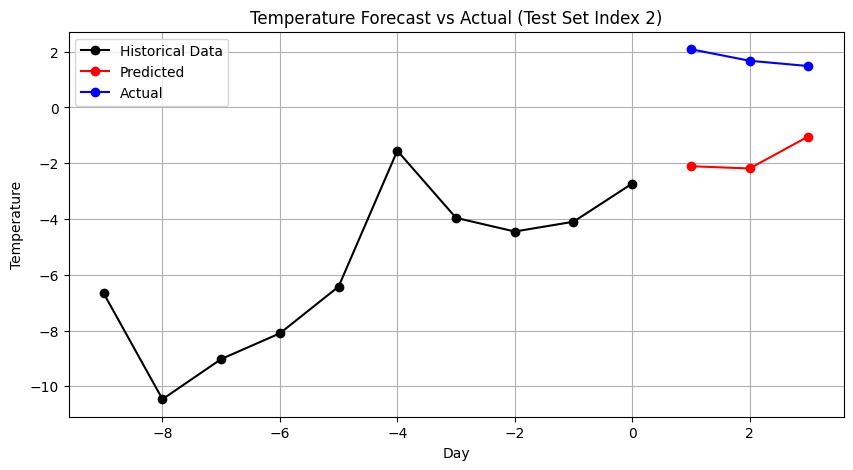

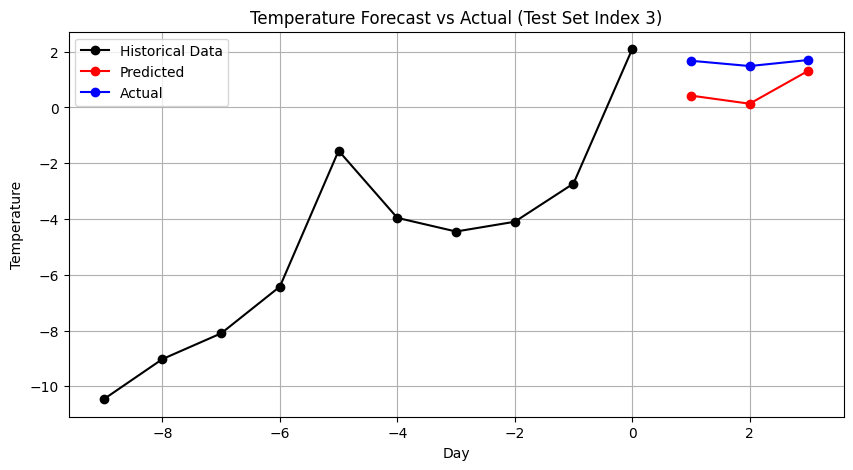

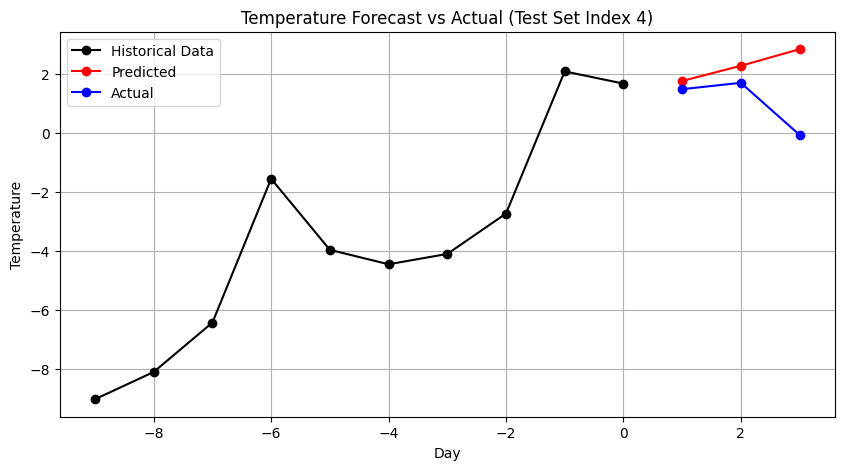

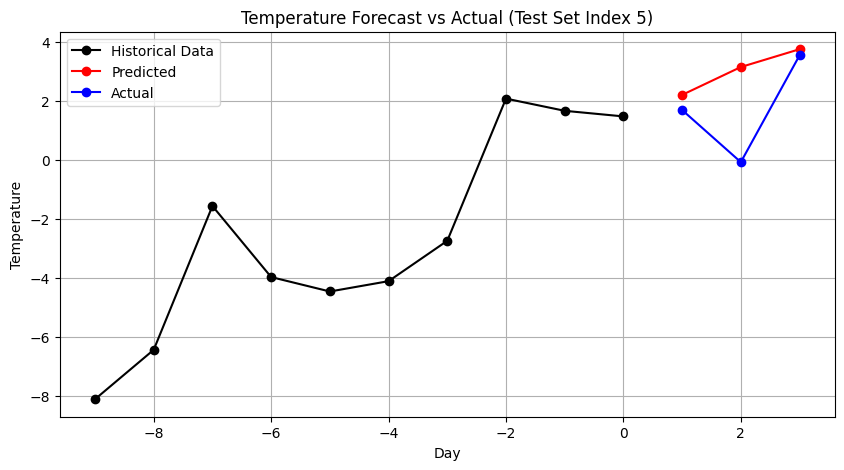

In [160]:
# De 3 opvolgende datapunten vergelijken met de voorspellingen
for i in range(len(predicted)):
    plt.figure(figsize=(10, 5))
    
    # Historical data points
    historical_days = np.arange(-9, 1)  # 5 days before prediction
    plt.plot(historical_days, X_test[i], 'ko-', label='Historical Data')
    
    # Predictions and actual future values
    future_days = np.arange(1, 4)  # Days into the future
    plt.plot(future_days, predicted[i], 'ro-', label='Predicted')
    plt.plot(future_days, y_test[i], 'bo-', label='Actual')
    
    plt.xlabel('Day')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Forecast vs Actual (Test Set Index {i})')
    plt.legend()
    plt.grid(True)
    plt.show()

    if i >= 5:  # Limiting to plot only the first 3 test samples for brevity
        break

Het model heeft het patroon in de reeks geleerd (sinusfunctie), maar kan de ruis op de data niet voorspellen (de ruis is niet voorspelbaar). De eerste dataset is eigenlijk enkel willekeirige ruis zonder patroon.